### Data Preprocessing

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib import pyplot
import mysql.connector
import csv
import seaborn as sns
import scipy.stats as stats
import pylab
from sklearn.metrics import mean_squared_error
import statsmodels.graphics.tsaplots as tsa_plots
from math import sqrt

#### Import Dataset

In [2]:
# Importing dataset
pharma_data=pd.read_csv('Medical Inventory Optimization Dataset - Cleaned.csv')

In [3]:
# Viewing dataset 
pharma_data.head(10)

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,01-06-2022,1,0,55.406,59.260,0.000,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,7-23-2022,1,0,768.638,950.800,0.000,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,6-23-2022,1,0,774.266,4004.214,0.000,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3,Sale,12018079281,Specialisation40,Department1,3-17-2022,2,0,40.798,81.044,0.000,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
4,Sale,12018117928,Specialisation5,Department1,12-21-2022,1,0,40.434,40.504,0.000,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM
5,Return,12018103662,Specialisation2,Department1,7-15-2022,0,8,47.902,0.000,330.288,Form1,SALBUTAMOL 2.5MG,INHALERS & RESPULES,RESPIRATORY SYSTEM
6,Sale,12018097585,Specialisation2,Department1,5-22-2022,1,0,41.862,42.218,0.000,Form1,FUROSEMIDE 10MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
7,Sale,12018077721,Specialisation4,Department1,12-01-2022,3,0,60.026,142.752,0.000,Form1,SODIUM CHLORIDE IVF 100ML,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
8,Sale,12018096500,Specialisation4,Department2,8-24-2022,2,0,49.856,94.000,0.000,Form2,SODIUM BICARBONATE 8.5% INJ,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
9,Sale,12018071649,Specialisation4,Department1,8-31-2022,1,0,258.860,319.800,0.000,Form1,PEPTIDE BASED DIET POWDER,NUTRITIONAL SUPPLEMENTS,NUTRITION


In [4]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

#### Dataframe Shape & Data Type

In [5]:
# Checking shape of dataset
pharma_data.shape

(14218, 14)

In [6]:
# Viewing datatypes
pharma_data.dtypes

Typeofsales        object
Patient_ID          int64
Specialisation     object
Dept               object
Dateofbill         object
Quantity            int64
ReturnQuantity      int64
Final_Cost        float64
Final_Sales       float64
RtnMRP            float64
Formulation        object
DrugName           object
SubCat             object
SubCat1            object
dtype: object

#### Type Casting

In [7]:
# Type casting
pharma_data["Patient_ID"] = pharma_data["Patient_ID"].astype('str')
pharma_data["Final_Sales"] = pharma_data["Final_Sales"].astype('float32')
pharma_data["Final_Cost"] = pharma_data["Final_Cost"].astype('float32')

In [8]:
# Viewing datatypes
pharma_data.dtypes

Typeofsales        object
Patient_ID         object
Specialisation     object
Dept               object
Dateofbill         object
Quantity            int64
ReturnQuantity      int64
Final_Cost        float32
Final_Sales       float32
RtnMRP            float64
Formulation        object
DrugName           object
SubCat             object
SubCat1            object
dtype: object

#### Handling Duplicates

In [9]:
# Checking duplicate values
duplicate = pharma_data.duplicated()  
sum(duplicate)

26

In [10]:
# Removing duplicate values
pharma_data = pharma_data.drop_duplicates() 
duplicate = pharma_data.duplicated()
sum(duplicate) 

0

#### Handling Missing Values

In [11]:
# Replacing missing values
pharma_data.replace('', pd.NA, inplace=True)

In [12]:
# Checking missisng values
pharma_data.isnull().sum()

Typeofsales          0
Patient_ID           0
Specialisation       0
Dept                 0
Dateofbill           0
Quantity             0
ReturnQuantity       0
Final_Cost           0
Final_Sales          0
RtnMRP               0
Formulation        650
DrugName          1659
SubCat            1659
SubCat1           1682
dtype: int64

In [13]:
group_cols = ['Typeofsales', 'Specialisation', 'Dept']

##### Imputation (Mode)

In [14]:
# Applying Imputation to missing values (beforehand we have removed this, we will not do same now)
pharma_data.dropna(subset=['SubCat1','DrugName','SubCat','Formulation'],inplace=True)

In [15]:
# Impute missing values in Formulation column based on the mode of the group
for col in ['Formulation', 'DrugName', 'SubCat', 'SubCat1']:
    pharma_data[col] = pharma_data.groupby(group_cols)[col].apply(
        lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [16]:
# Checking missing values
pharma_data.isnull().sum()

Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       0
DrugName          0
SubCat            0
SubCat1           0
dtype: int64

In [17]:
# Still there are some missing values that need to be dropped
pharma_data.dropna(inplace=True)
pharma_data= pharma_data.reset_index(drop=True)
pharma_data.isnull().sum()

Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       0
DrugName          0
SubCat            0
SubCat1           0
dtype: int64

#### Data Manipulation

In [18]:
# Checking datatyoe of 'Dateofbill' column
date_column = 'Dateofbill'
pharma_data[date_column] = pd.to_datetime(pharma_data[date_column])

# Sort dataset by date column in ascending order
pharma_data = pharma_data.sort_values(by=date_column, ascending=True)

In [19]:
# Specify Final Cost column to round
column_name = 'Final_Cost'

# Specify number of decimal places to round to 0
decimal_places = 0

# Round the values in the column to 0
pharma_data[column_name] = pharma_data[column_name].apply(
    lambda x: round(x, decimal_places))

# Specify Final Sales column to round
column_name1 = 'Final_Sales'

# Specify number of decimal places to round to 0
decimal_places1 = 0

# Round values in the column to 0
pharma_data[column_name1] = pharma_data[column_name1].apply(
    lambda x: round(x, decimal_places1))


In [20]:
# Dropping column
pharma_data.drop(columns=["ReturnQuantity"], axis=1, inplace=True)

In [21]:
# Viewing dataset
pharma_data.head(10)

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
6247,Sale,12018071419,Specialisation4,Department2,2022-01-01,1,44.0,47.0,0.00,Form1,LIGNOCAINE HYDROCHLORIDE 2% INJ,"OINTMENTS, CREAMS & GELS",ANAESTHETICS
130,Sale,12018081316,Specialisation3,Department1,2022-01-01,2,49.0,104.0,0.00,Form1,CEFTRIAXONE 1GM,INJECTIONS,ANTI-INFECTIVES
1935,Sale,12018081605,Specialisation2,Department1,2022-01-01,2,62.0,112.0,0.00,Form1,SODIUM CHLORIDE 0.9%,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
9975,Sale,12018080728,Specialisation4,Department1,2022-01-01,1,72.0,82.0,0.00,Form1,LIQUID PARAFFIN + MILK OF MAGNESIA,SYRUP & SUSPENSION,GASTROINTESTINAL & HEPATOBILIARY SYSTEM
10648,Sale,12018038526,Specialisation5,Department1,2022-01-01,3,60.0,139.0,0.00,Form1,DEXTROSE 10%W/V 500ML IVF,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
10689,Sale,12018072643,Specialisation11,Department1,2022-01-01,1,44.0,47.0,0.00,Form1,LIGNOCAINE HYDROCHLORIDE 2% INJ,"OINTMENTS, CREAMS & GELS",ANAESTHETICS
11981,Sale,12018075045,Specialisation4,Department1,2022-01-01,1,48.0,50.0,0.00,Form1,FLUCONAZOLE 50MG TAB,TABLETS & CAPSULES,ANTI-INFECTIVES
11884,Sale,12018064578,Specialisation10,Department2,2022-01-01,3,121.0,308.0,0.00,Form1,PROPOFOL 1% 20ML INJ,INJECTIONS,ANAESTHETICS
9247,Return,12018081506,Specialisation2,Department1,2022-01-01,0,132.0,0.0,336.76,Form1,ENOXAPARIN 60MG,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
1595,Sale,12018044636,Specialisation21,Department1,2022-01-01,2,45.0,87.0,0.00,Form1,SODIUM CHLORIDE 0.9%,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS


In [22]:
# Convert date formate to month
pharma_data['Dateofbill'] = pd.to_datetime(pharma_data['Dateofbill'])
pharma_data['Dateofbill'] = pharma_data['Dateofbill'].dt.strftime('%b')
pharma_data.head()

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
6247,Sale,12018071419,Specialisation4,Department2,Jan,1,44.0,47.0,0.0,Form1,LIGNOCAINE HYDROCHLORIDE 2% INJ,"OINTMENTS, CREAMS & GELS",ANAESTHETICS
130,Sale,12018081316,Specialisation3,Department1,Jan,2,49.0,104.0,0.0,Form1,CEFTRIAXONE 1GM,INJECTIONS,ANTI-INFECTIVES
1935,Sale,12018081605,Specialisation2,Department1,Jan,2,62.0,112.0,0.0,Form1,SODIUM CHLORIDE 0.9%,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
9975,Sale,12018080728,Specialisation4,Department1,Jan,1,72.0,82.0,0.0,Form1,LIQUID PARAFFIN + MILK OF MAGNESIA,SYRUP & SUSPENSION,GASTROINTESTINAL & HEPATOBILIARY SYSTEM
10648,Sale,12018038526,Specialisation5,Department1,Jan,3,60.0,139.0,0.0,Form1,DEXTROSE 10%W/V 500ML IVF,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS


In [23]:
# Pivot the DataFrame based on SubCat of drugs
data_pivoted = pharma_data.pivot_table(index="SubCat", columns="Dateofbill", values="Quantity")
# Result
data_pivoted.head()

Dateofbill,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
SubCat,,,,,,,,,,,,
DROPS,0.875000,1.000000,0.500000,0.666667,0.333333,1.000000,1.000000,1.000000,0.833333,1.000000,1.000000,0.875000
INHALERS & RESPULES,2.766667,3.195652,2.804348,3.000000,4.075000,3.609756,3.028571,2.942857,3.131579,3.333333,2.324324,3.145833
INJECTIONS,1.962121,2.138318,1.916118,2.140741,1.877069,1.928705,1.857143,1.937143,1.703422,2.135827,1.956274,1.983108
"IV FLUIDS, ELECTROLYTES, TPN",1.869198,1.918103,1.877934,1.850000,1.963731,1.902128,2.084158,1.938967,1.956140,1.744565,1.752809,1.751244
LIQUIDS & SOLUTIONS,3.863636,5.148148,9.885714,3.937500,9.888889,6.318182,2.000000,7.520000,7.000000,19.000000,7.708333,0.937500


#### AutoEDA (D-Tale)

In [24]:
df_grouped = pharma_data[['Dateofbill','Quantity']]

In [25]:
# Group by Quantity and Month
df_grouped = df_grouped.groupby('Dateofbill').sum()

# Result
df_grouped.head(10)
df_grouped = df_grouped.reset_index()
df_grouped

,Dateofbill,Quantity
0,Apr,1936
1,Aug,2149
2,Dec,2290
3,Feb,1539
4,Jan,1840
5,Jul,2008
6,Jun,1743
7,Mar,1948
8,May,1818
9,Nov,2106


In [26]:
# Create dictionary to map month names into numerical values
dict_month = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Create a new column with the numerical values of the months
df_grouped['Monthindex'] = df_grouped['Dateofbill'].map(dict_month)

df_grouped = df_grouped.sort_values(by='Monthindex')

In [27]:
# Drop Monthindex column
df_grouped = df_grouped.drop(columns=['Monthindex'])
df_grouped = df_grouped.reset_index(drop=True)
df_grouped

,Dateofbill,Quantity
0,Jan,1840
1,Feb,1539
2,Mar,1948
3,Apr,1936
4,May,1818
5,Jun,1743
6,Jul,2008
7,Aug,2149
8,Sep,1921
9,Oct,1831


#### One-Hot Encoding

In [28]:
# Applying one hot encoding
data1 = pd.get_dummies(df_grouped.Dateofbill)
data1.columns

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object')

In [29]:
# Viewing dataset
data = pd.concat([df_grouped , data1] , axis = 1)
data

,Dateofbill,Quantity,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan,1840,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb,1539,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar,1948,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr,1936,1,0,0,0,0,0,0,0,0,0,0,0
4,May,1818,0,0,0,0,0,0,0,0,1,0,0,0
5,Jun,1743,0,0,0,0,0,0,1,0,0,0,0,0
6,Jul,2008,0,0,0,0,0,1,0,0,0,0,0,0
7,Aug,2149,0,1,0,0,0,0,0,0,0,0,0,0
8,Sep,1921,0,0,0,0,0,0,0,0,0,0,0,1
9,Oct,1831,0,0,0,0,0,0,0,0,0,0,1,0


In [30]:
# Adding 'log_Quantity' column
data['log_Quantity'] = np.log(data['Quantity'])
data

,Dateofbill,Quantity,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,log_Quantity
0,Jan,1840,0,0,0,0,1,0,0,0,0,0,0,0,7.517521
1,Feb,1539,0,0,0,1,0,0,0,0,0,0,0,0,7.338888
2,Mar,1948,0,0,0,0,0,0,0,1,0,0,0,0,7.574558
3,Apr,1936,1,0,0,0,0,0,0,0,0,0,0,0,7.568379
4,May,1818,0,0,0,0,0,0,0,0,1,0,0,0,7.505492
5,Jun,1743,0,0,0,0,0,0,1,0,0,0,0,0,7.463363
6,Jul,2008,0,0,0,0,0,1,0,0,0,0,0,0,7.604894
7,Aug,2149,0,1,0,0,0,0,0,0,0,0,0,0,7.672758
8,Sep,1921,0,0,0,0,0,0,0,0,0,0,0,1,7.560601
9,Oct,1831,0,0,0,0,0,0,0,0,0,0,1,0,7.512618


In [31]:
# Adding 't' and 't_square' columns
data["t"] = np.arange(1,13)
data["t_square"] = data["t"] * data["t"]
data

,Dateofbill,Quantity,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,log_Quantity,t,t_square
0,Jan,1840,0,0,0,0,1,0,0,0,0,0,0,0,7.517521,1,1
1,Feb,1539,0,0,0,1,0,0,0,0,0,0,0,0,7.338888,2,4
2,Mar,1948,0,0,0,0,0,0,0,1,0,0,0,0,7.574558,3,9
3,Apr,1936,1,0,0,0,0,0,0,0,0,0,0,0,7.568379,4,16
4,May,1818,0,0,0,0,0,0,0,0,1,0,0,0,7.505492,5,25
5,Jun,1743,0,0,0,0,0,0,1,0,0,0,0,0,7.463363,6,36
6,Jul,2008,0,0,0,0,0,1,0,0,0,0,0,0,7.604894,7,49
7,Aug,2149,0,1,0,0,0,0,0,0,0,0,0,0,7.672758,8,64
8,Sep,1921,0,0,0,0,0,0,0,0,0,0,0,1,7.560601,9,81
9,Oct,1831,0,0,0,0,0,0,0,0,0,0,1,0,7.512618,10,100


# Model Building

In this code, a predictive modeling process is being performed on a dataset. The goal is to build different regression models to predict the "Quantity" based on the variable "t" using different mathematical functions. The code uses Python with libraries like statsmodels, pandas, and numpy for the analysis.

Here's a summary of what's happening:

1. **Data Partition:** The dataset is split into two parts, "Train" and "Test." Typically, the training set is used to build the models, and the test set is used to evaluate the model's performance.

2. **Linear Model:**
   - A linear regression model is built using Ordinary Least Squares (OLS) from the `statsmodels` library.
   - The formula 'Quantity ~ t' specifies that "Quantity" is predicted based on the "t" variable.
   - The model is trained using the "Train" dataset.
   - The model is pickled (serialized) and saved to a file named 'linear_model.pkl.'
   - Predictions are made on the test set using the trained model.
   - Mean Absolute Percentage Error (MAPE) is calculated to evaluate the model's accuracy. MAPE measures the accuracy of a forecasting method.
   - The MAPE for the linear model is approximately 4.57%.

3. **Exponential Model:**
   - An exponential regression model is built.
   - Instead of using "Quantity" as is, the model uses the natural logarithm of "Quantity" (log_Quantity) as the dependent variable to perform exponential regression.
   - The model is trained and used to make predictions on the test set.
   - MAPE is calculated for the exponential model, which is approximately 4.55%.

4. **Quadratic Model:**
   - A quadratic regression model is built, which allows for a more complex relationship between "Quantity" and "t."
   - The formula 'Quantity ~ t + t_square' includes both "t" and the square of "t" as predictors.
   - The model is trained and used to make predictions on the test set.
   - MAPE is calculated for the quadratic model, which is approximately 4.93%.

5. **Additive Seasonality:**
   - An additive regression model is built to analyze seasonality.
   - The formula 'Quantity ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec' includes indicator variables for each month.
   - The model is trained and used to make predictions on the test set.
   - MAPE is calculated for this additive seasonality model, resulting in a very small value (approximately 4.61e-14). This suggests that the model fits the data well, indicating the presence of seasonality.

6. **Multiplicative Seasonality:**
   - A multiplicative regression model is built. This model includes the natural logarithm of "Quantity" as the dependent variable, allowing for multiplicative seasonality.
   - The model is trained and used to make predictions on the test set.
   - MAPE is calculated for the multiplicative seasonality model, resulting in a very small value (approximately 3.88e-13). This also indicates a good fit and the presence of seasonality.

7. **Additive Seasonality Quadratic Trend:**
   - An additive regression model is built with both seasonality (monthly indicators) and a quadratic trend.
   - The formula 'Quantity ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec' includes time-related variables along with monthly indicators.
   - The model is trained and used to make predictions on the test set.
   - MAPE is calculated for this model, resulting in a very small value (approximately 4.68e-13). This suggests that the model captures both seasonality and trend effects.

8. **Multiplicative Seasonality Linear Trend:**
   - A multiplicative regression model is built with a linear trend and seasonality.
   - The formula 'log_Quantity ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec' includes a linear time trend along with monthly indicators.
   - The model is trained and used to make predictions on the test set.
   - MAPE is calculated for this model, resulting in a very small value (approximately 1.34e-12). This indicates that the model effectively captures both seasonality and a linear trend.

Overall, these models aim to understand the impact of seasonality and trend on the "Quantity" variable, and they appear to fit the data well, as suggested by the low MAPE values. The specific choice between additive and multiplicative models and the inclusion of trends depends on the characteristics of the data and the research question being addressed.
The purpose of this code is to compare the performance of different regression models (linear, exponential, and quadratic) in predicting "Quantity" using the given predictor variable "t" and to assess their accuracy using MAPE. These models provide different ways to understand and represent the relationship between "Quantity" and "t."

### Linear

In [32]:
# Data Partition
Train = data
Test = data

In [33]:
import statsmodels.formula.api as smf

linear = smf.ols('Quantity ~ t', data = Train).fit()
pickle.dump(linear,open('linear_model.pkl','wb'))

In [34]:
pred_linear =  pd.Series(linear.predict(pd.DataFrame(Test['t'])))
mape_linear = np.mean(np.abs((Test['Quantity'] - (pred_linear)) / Test['Quantity'])) * 100
mape_linear

6.831726447901011

### Exponential

In [35]:
Exponential = smf.ols('log_Quantity ~ t', data = Train).fit()
pred_Exponential = pd.Series(Exponential.predict(pd.DataFrame(Test['t'])))

In [36]:
mape_Exponential = np.mean(np.abs((Test['Quantity'] - np.exp(pred_Exponential)) / Test['Quantity'])) * 100
mape_Exponential

6.807144213067417

### Quadratic

In [37]:
Quadratic = smf.ols('Quantity ~ t + t_square', data = Train).fit()
pred_Quadratic = pd.Series(Quadratic.predict(Test[["t", "t_square"]]))

In [38]:
mape_Quadratic = np.mean(np.abs((Test['Quantity'] - (pred_Quadratic)) / Test['Quantity'])) * 100
mape_Quadratic

6.497563708237382

### Additive Seasonality

In [39]:
addSeasonality = smf.ols('Quantity ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=Train).fit()
pred_addSeasonality = pd.Series(addSeasonality.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))

In [40]:
mape_addSeasonality = np.mean(np.abs((Test['Quantity'] - (pred_addSeasonality)) / Test['Quantity'])) * 100
mape_addSeasonality

4.166793298300165e-14

### Multiplicative Seasonality

In [41]:
MulSeasonality = smf.ols('log_Quantity ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_MultSeasonality = pd.Series(MulSeasonality.predict(Test))
mape_MultSeasonality = np.mean(np.abs((Test['Quantity'] - np.exp(pred_MultSeasonality)) / Test['Quantity'])) * 100
mape_MultSeasonality

2.558513156054957e-13

##### Additive Seasonality Quadratic Trend

In [42]:
add_seaQuadratic = smf.ols('Quantity ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_seaQuadratic = pd.Series(add_seaQuadratic.predict(Test[['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov' , 'Oct' , 'Sep' ,'t','t_square']]))
mape_add_seaQuadratic = np.mean(np.abs((Test['Quantity'] - (pred_add_seaQuadratic)) / Test['Quantity'])) * 100
mape_add_seaQuadratic

5.248545121121444e-13

### Multiplicative Seasonality Linear Trend

In [43]:
Mul_SeasonalityLinear = smf.ols('log_Quantity ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_MultSeasonalityLinear = pd.Series(Mul_SeasonalityLinear.predict(Test))

In [44]:
mape_MultSeasonalityLinear = np.mean(np.abs((Test['Quantity'] - np.exp(pred_MultSeasonalityLinear)) / Test['Quantity'])) * 100
mape_MultSeasonalityLinear

1.3074185172855868e-12

In [45]:
# Printing every model's MAPE value
data1 = {"MODEL":pd.Series(["mape_linear","mape_Exponential","mape_Quadratic","mape_addSeasonality","mape_MultSeasonality","mape_add_seaQuadratic","mape_MultSeasonalityLinear"]),"MAPE_Values":pd.Series([mape_linear,mape_Exponential,mape_Quadratic,mape_addSeasonality,mape_MultSeasonality,mape_add_seaQuadratic,mape_MultSeasonalityLinear])}
table_mape = pd.DataFrame(data1)
table_mape

,MODEL,MAPE_Values
0,mape_linear,6.831726e+00
1,mape_Exponential,6.807144e+00
2,mape_Quadratic,6.497564e+00
3,mape_addSeasonality,4.166793e-14
4,mape_MultSeasonality,2.558513e-13
5,mape_add_seaQuadratic,5.248545e-13
6,mape_MultSeasonalityLinear,1.307419e-12


In [46]:
# Model fit
model_full = smf.ols('Quantity ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()

In [47]:
# Printing pred_new
predict_data = data
pred_new  = pd.Series(model_full.predict(predict_data))
pred_new

0     1840.0
1     1539.0
2     1948.0
3     1936.0
4     1818.0
5     1743.0
6     2008.0
7     2149.0
8     1921.0
9     1831.0
10    2106.0
11    2290.0
dtype: float64

In [48]:
# Prediction
predict_data["forecasted_Quantity"] = pd.Series(pred_new)

In [49]:
# Save modekl
model_full.save("model.pickle")

In [50]:
# Load model
from statsmodels.regression.linear_model import OLSResults
model = OLSResults.load("model.pickle")

# Autoregression Model

An autoregression model, often referred to as an autoregressive model or simply an AR model, is a fundamental time series forecasting technique used in statistics and econometrics. This model assumes that a variable's value is linearly related to its past values. In other words, it predicts a variable's future value based on its own previous values, making it a form of a self-regression. Autoregression models are widely used in various fields, including finance, economics, and climate science, to capture and predict time-dependent patterns and dependencies in data. They provide a valuable tool for understanding and forecasting sequential data points, making them essential in time series analysis and prediction.

In [51]:
# Calculating Residuals from best model applied on full data
# AV - FV
full_res = data.Quantity - model_full.predict(data)

This code snippet utilizes the `statsmodels` library for time series analysis and forecasting. It first creates autocorrelation and partial autocorrelation plots for the time series data stored in the variable `full_res`, with a specific number of lags specified. Autocorrelation and partial autocorrelation plots help analyze the correlation between a time series and its past observations, which is essential for determining appropriate parameters for time series models like ARIMA (AutoRegressive Integrated Moving Average). These plots are valuable in understanding and selecting the order of differencing and lag values for the ARIMA model to ensure accurate time series forecasting.

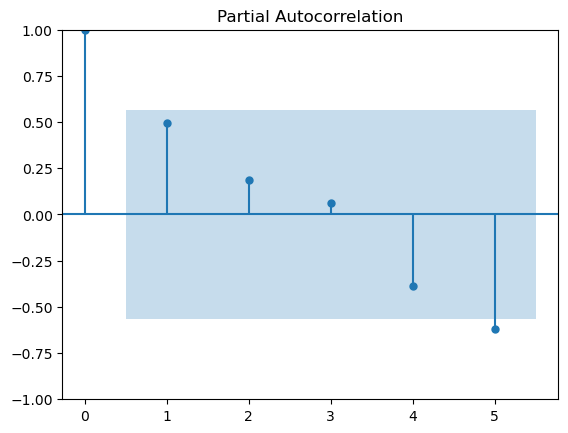

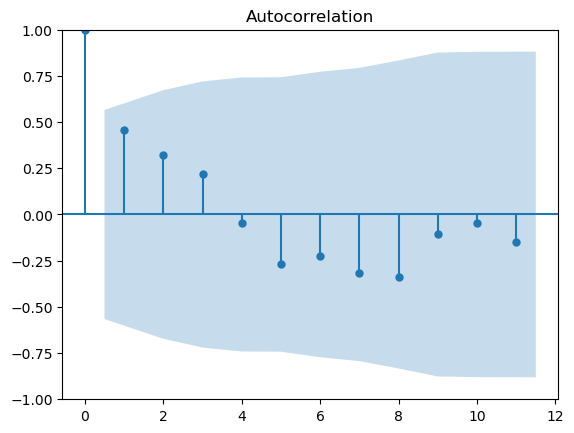

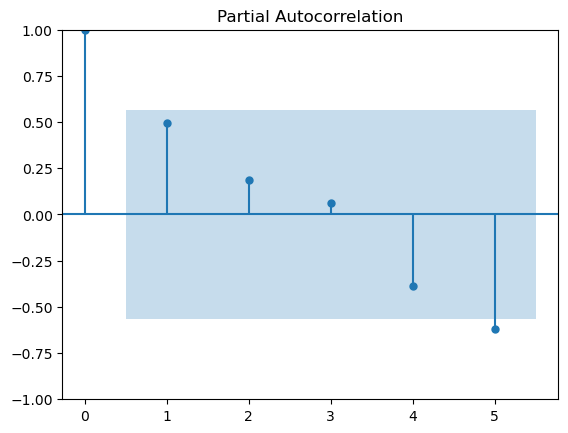

In [52]:
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA
'''
The code generates autocorrelation and partial autocorrelation plots for time series data to analyze its correlation
with past observations, aiding in parameter selection for time series modeling, such as ARIMA, which is essential for
accurate forecasting.
'''
tsa_plots.plot_acf(full_res, lags = 11)
tsa_plots.plot_pacf(full_res, lags = 5 )

In this code, an autoregressive (AR) model is implemented using the AutoReg function from statsmodels. It's applied to the full_res time series data with a lag of 1. The coefficients of the model are printed, and predictions are generated for a specific range in the future. The final predictions are calculated by combining these AR model predictions with other predictions, likely from another model.

In [53]:
# AR model
from statsmodels.tsa.ar_model import AutoReg
model_ar = AutoReg(full_res, lags=[1])

# model_ar = AutoReg(Train_res, lags=12)
model_fit = model_ar.fit()

print('Coefficients: %s' % model_fit.params)

pred_res = model_fit.predict(start=len(full_res), end=len(full_res)+len(predict_data)-1, dynamic=False)
pred_res.reset_index(drop=True, inplace=True)

# The Final Predictions using ASQT and AR(1) Model
final_pred = pred_new + pred_res
final_pred

Coefficients: const    5.448005e-12
y.L1     6.147899e-01
dtype: float64


0     1840.0
1     1539.0
2     1948.0
3     1936.0
4     1818.0
5     1743.0
6     2008.0
7     2149.0
8     1921.0
9     1831.0
10    2106.0
11    2290.0
dtype: float64

# Arima Model

The ARIMA (AutoRegressive Integrated Moving Average) model is a powerful time series forecasting method. It combines autoregressive (AR), differencing (I), and moving average (MA) components to capture different aspects of a time series. The AR component models the relationship between an observation and its lagged values, the differencing component makes the time series stationary, and the MA component models the relationship between an observation and a residual error from a moving average model. ARIMA models are widely used for forecasting because they can handle a wide range of time series data patterns and seasonality.

In [54]:
# Train/Test data
train = df_grouped
test= df_grouped
train

,Dateofbill,Quantity
0,Jan,1840
1,Feb,1539
2,Mar,1948
3,Apr,1936
4,May,1818
5,Jun,1743
6,Jul,2008
7,Aug,2149
8,Sep,1921
9,Oct,1831


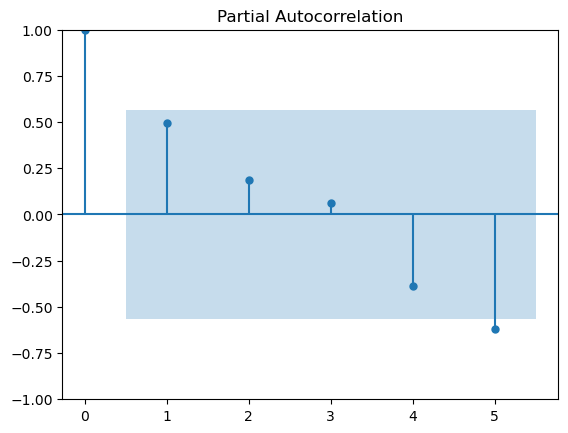

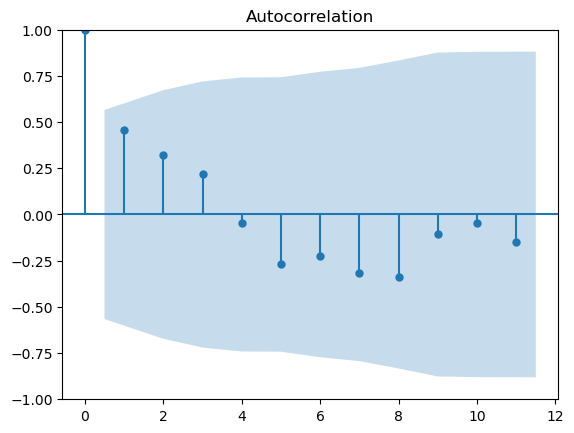

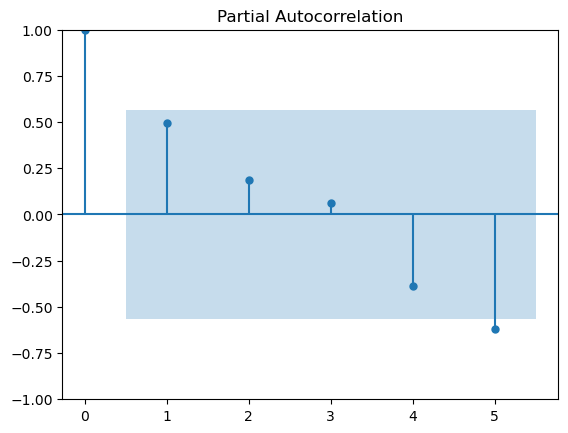

In [55]:
# Plotting graphs
tsa_plots.plot_acf(full_res, lags = 11)
tsa_plots.plot_pacf(full_res, lags = 5 )

This code segment is fitting an ARIMA (AutoRegressive Integrated Moving Average) model to a training dataset, specifically with an order of (5, 1, 2). The (5, 1, 2) order indicates that the model includes autoregressive terms of order 5, one order of differencing, and moving average terms of order 2. After fitting the model, it generates a summary report of the results. This summary provides information about the model's performance and statistics, which are essential for evaluating the model's goodness of fit and forecasting accuracy.

In [56]:
# Model fitting
model1 = ARIMA(train.Quantity, order = (5,1,2))
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Quantity   No. Observations:                   12
Model:                 ARIMA(5, 1, 2)   Log Likelihood                   0.000
Date:                Thu, 26 Oct 2023   AIC                             16.000
Time:                        09:51:01   BIC                             19.183
Sample:                             0   HQIC                            13.993
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.8189         -0        inf      0.000      -2.819      -2.819
ar.L2         -1.8189   6.79e-08  -2.68e+07      0.000      -1.819      -1.819
ar.L3          1.8189        nan        nan        nan         nan         nan
ar.L4          2.8189   5.39e-08   5.23e+07      0.000       2.819       2.819
ar.L5          1.0000   2.22e-08   4.51e+07      0.000       1.000       1.000
ma.L1         -1.9997   4.22e-08  -4.74e+07      0.000      -2.000      -2.000
ma.L2          0.9997    4.1e-08   2.44e+07      0.000       1.000       1.000
sigma2       2.15e+05   1.91e-13   1.13e+18      0.000    2.15e+05    2.15e+05
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In this code, you are performing a forecast using the ARIMA (AutoRegressive Integrated Moving Average) model. 

- `start_index` is calculated as the length of the training dataset, indicating the starting point for the forecast.
- `end_index` is determined as `start_index + 11`, which specifies the end point for the forecast.
- Finally, `forecast_test` is generated using the ARIMA model to predict values from `start_index` to `end_index`, providing forecasts for the specified range.

In [58]:
#Code applies ARIMA for time series forecasting by predicting future values from the end of the training 
#dataset
start_index = len(train)
start_index
end_index = start_index + 11
forecast_test = res1.predict(start = start_index, end = end_index)

In [59]:
# Printing forecast values
forecast_test = pd.DataFrame(forecast_test)
forecast_test

,predicted_mean
12,0.0
13,0.0
14,0.0
15,0.0
16,0.0
17,0.0
18,0.0
19,0.0
20,0.0
21,0.0


Calculating the root mean squared error (RMSE) for evaluating the accuracy of the ARIMA model's predictions on the test dataset.

In [60]:
# Calculating root mean squared error (RMSE)
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse_test = sqrt(mean_squared_error(test.Quantity, forecast_test))

print('test RMSE: %.3f' % rmse_test)

test RMSE: 1936.761


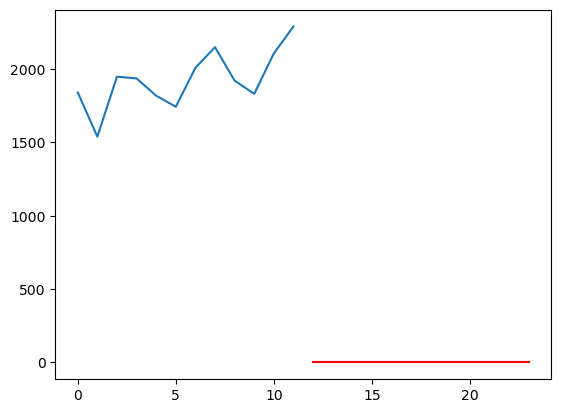

In [61]:
# Plotting curve
plt.plot(test.Quantity)
plt.plot(forecast_test, color = 'red')
plt.show()

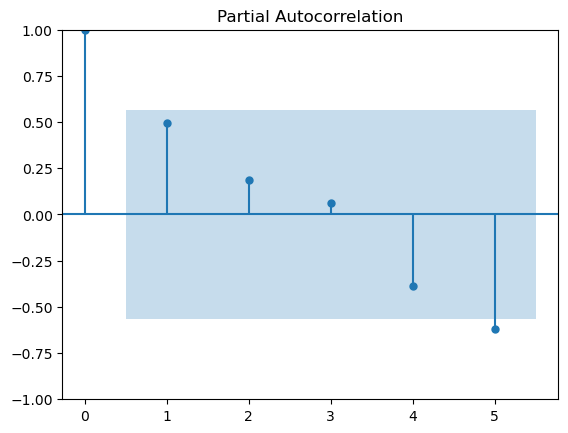

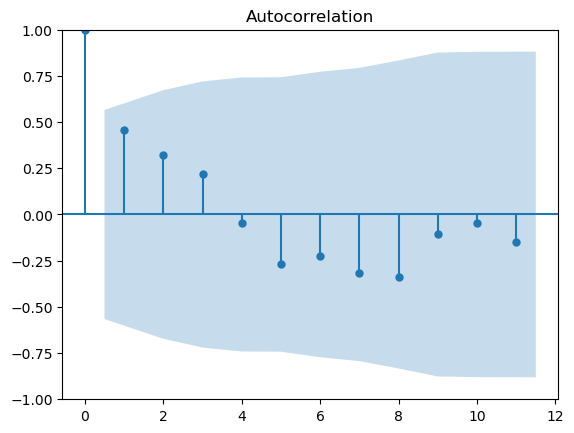

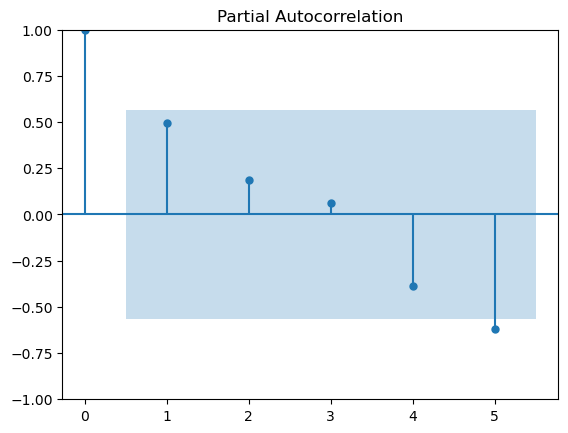

In [62]:
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA

tsa_plots.plot_acf(full_res, lags = 11)
tsa_plots.plot_pacf(full_res, lags = 5 )

Automated the selection of an ARIMA model for the training data, finding the best order parameters for the autoregressive (AR) and moving average (MA) components. The selected model summary is not shown in the provided code snippet, but it would be used to describe the model's characteristics and fitness.

In [63]:
import pmdarima as pm
# help(pm.auto_arima)

ar_model = pm.auto_arima(train.Quantity, start_p = 0, start_q = 0,
                      max_p = 16, max_q = 16, # maximum p and q
                      m = 1,              # frequency of series
                      d = None,           # let model determine 'd'
                      seasonal = False,   # No Seasonality
                      start_P = 0, trace = True,
                      error_action = 'warn', stepwise = True)

# Print model summary
model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=153.593, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=154.633, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=151.976, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.544 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 26 Oct 2023   Prob (F-statistic):                nan
Time:                        09:53:13   Log-Likelihood:                 283.80
No. Observations:                  12   AIC:                            -543.6
Df Residuals:                       0   BIC:                            -537.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    899.9270        inf          0        nan         nan         nan
t            273.5411        inf          0        nan         nan         nan
t_square     -15.2404        inf         -0        nan         nan         nan
Jan          681.7723        inf          0        nan         nan         nan
Feb          152.9524        inf          0        nan         nan         nan
Mar          364.6133        inf          0        nan         nan         nan
Apr          185.7550        inf          0        nan         nan         nan
May          -68.6226        inf         -0        nan         nan         nan
Jun         -249.5193        inf         -0        nan         nan         nan
Jul          -59.9353        inf         -0        nan         nan         nan
Aug           36.1295        inf          0        nan         nan         nan
Sep         -206.3249        inf         -0        nan         nan         nan
Oct         -280.2985        inf         -0        nan         nan         nan
Nov           41.2086        inf          0        nan         nan         nan
Dec          302.1966        inf          0        nan         nan         nan
==============================================================================
Omnibus:                        1.911   Durbin-Watson:                   0.296
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                0.986
Skew:                           0.307   Prob(JB):                        0.611
Kurtosis:                       1.737   Cond. No.                         248.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
"""

In [64]:
# Predictions on test set
predictions =ar_model.predict(n_periods=len(test))

# Calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test.Quantity, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 409.357


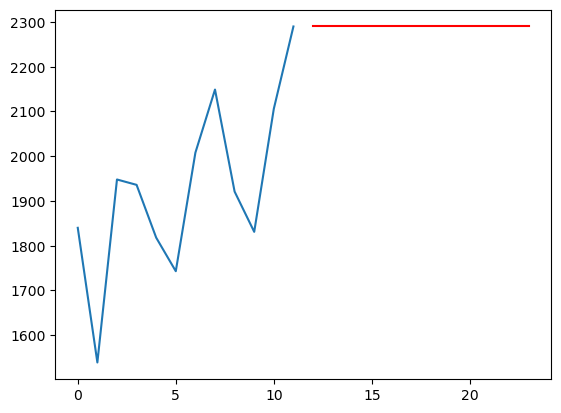

In [65]:
# Plot predictions against actual values
plt.plot(test.Quantity)
plt.plot(predictions, color='red')
plt.show()

# Auto ARIMA

In [66]:
# Model fitting
model = ARIMA(train.Quantity, order = (1,0,1))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Quantity   No. Observations:                   12
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -78.955
Date:                Thu, 26 Oct 2023   AIC                            165.910
Time:                        09:53:14   BIC                            167.850
Sample:                             0   HQIC                           165.192
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1937.8914     72.987     26.551      0.000    1794.840    2080.943
ar.L1         -0.4383      0.842     -0.520      0.603      -2.089       1.212
ma.L1          0.9974     21.535      0.046      0.963     -41.211      43.206
sigma2      2.635e+04   5.53e+05      0.048      0.962   -1.06e+06    1.11e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.49
Prob(Q):                              0.90   Prob(JB):                         0.78
Heteroskedasticity (H):               0.76   Skew:                            -0.30
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
# Forecast for next 12 months
start_index = len(Train)
end_index = start_index + 11
forecast_best = res.predict(start = start_index, end = end_index)


forecast_best

12    1985.354556
13    1917.087356
14    1947.010280
15    1933.894444
16    1939.643386
17    1937.123506
18    1938.228022
19    1937.743890
20    1937.956095
21    1937.863081
22    1937.903851
23    1937.885980
Name: predicted_mean, dtype: float64

In [68]:
# Evaluate forecasts
rmse_best = sqrt(mean_squared_error(test.Quantity, forecast_best))
print('Test RMSE: %.3f' % rmse_best)

Test RMSE: 189.299


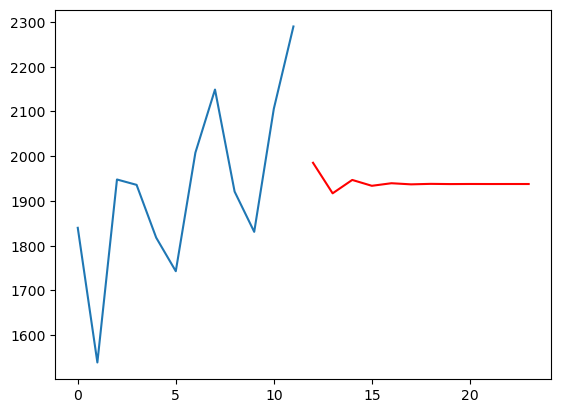

In [69]:
# Plot forecasts against actual outcomes
pyplot.plot(test.Quantity)
pyplot.plot(forecast_best, color = 'red')
pyplot.show()

# Holt-Winters Method

The Holt-Winters method is a widely used time series forecasting technique that takes into account three main components of time series data: 

1. **Level (L):** This component represents the baseline or the average value in the time series.

2. **Trend (T):** The trend component captures the overall direction or tendency of the data. It can be increasing, decreasing, or remain relatively stable over time.

3. **Seasonality (S):** The seasonality component accounts for regular, repeating patterns or fluctuations in the data, often associated with specific time intervals, like daily, weekly, or yearly.

The method has several variations based on how these components are combined:

- **Additive Seasonal Model:** This model assumes that the seasonality is added to the trend and level components. It is suitable when the seasonal fluctuations are relatively consistent in amplitude.

- **Multiplicative Seasonal Model:** In this case, seasonality is treated as a multiplication of the trend and level. This model is used when the seasonal fluctuations are proportional to the level of the series.

The Holt-Winters method uses these components to forecast future values in a time series by estimating their values over time. It does so by smoothing historical data, adapting to changes in the level, trend, and seasonality components. The method is particularly effective for time series data with clear seasonality patterns.

One of the key advantages of the Holt-Winters method is its adaptability to changing data patterns. It can give more weight to recent data, making it suitable for capturing evolving trends or seasonality.

In summary, the Holt-Winters method is a robust and flexible approach to time series forecasting, making it valuable in various domains, including economics, finance, and operations research. It's a powerful tool for understanding and predicting patterns in time series data.

In [70]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Fit an Exponential Smoothing model to the data
model = ExponentialSmoothing(df_grouped['Quantity'], seasonal_periods=4, trend='add', seasonal='mul')
model_fit = model.fit()

In [71]:
# Forecast for the next 12 periods
forecast = model_fit.forecast(steps=12)
forecast

12    2024.912398
13    1928.722518
14    2216.919602
15    2384.678271
16    2128.824796
17    2026.445036
18    2327.839201
19    2502.517407
20    2232.737194
21    2124.167553
22    2438.758800
23    2620.356543
dtype: float64

In [72]:
# Prepare train and test datasets
train =df_grouped.Quantity
test =df_grouped.Quantity

In [73]:
mape= np.mean(np.abs((test - forecast) / test)) * 100
print("MAPE:",mape)

MAPE: nan


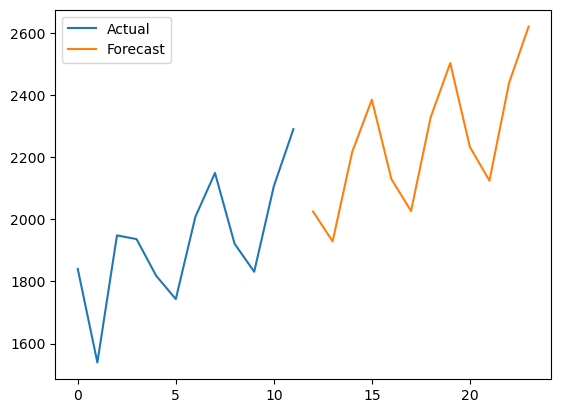

In [74]:
plt.plot(df_grouped['Quantity'], label='Actual')
plt.plot(forecast.index, forecast , label='Forecast')
plt.legend()
plt.show()

In [75]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Fit an Exponential Smoothing model to the data
model = ExponentialSmoothing(df_grouped['Quantity'], seasonal_periods=4, trend='mul', seasonal='add')
model_fit = model.fit()

In [76]:
# Forecast for next 12 periods
forecast = model_fit.forecast(steps=12)
forecast

12    2276.389648
13    2327.957817
14    2989.943459
15    3255.556057
16    3336.991503
17    3491.041711
18    4265.411850
19    4654.268246
20    4870.856082
21    5173.117955
22    6110.020906
23    6677.115057
dtype: float64

In [77]:
# Prepare train and test datasets
train = df_grouped.Quantity
test = df_grouped.Quantity

In [78]:
# Calculate root mean squared error (RMSE) of the forecast
mape= np.mean(np.abs((test - forecast) / test)) * 100
print("MAPE:",mape)

rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)

MAPE: nan
RMSE: 2508.7412554940715


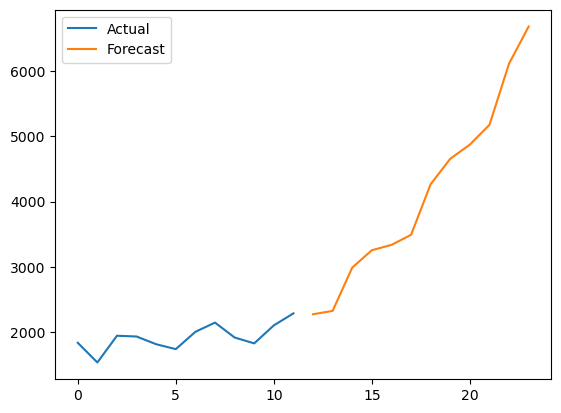

In [79]:
plt.plot(df_grouped['Quantity'], label='Actual')
plt.plot(forecast.index, forecast , label='Forecast')
plt.legend()
plt.show()

In [80]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Fit an Exponential Smoothing model to the data
model = ExponentialSmoothing(df_grouped['Quantity'], seasonal_periods=4, trend='add', seasonal='add')
model_fit = model.fit()

# Forecast for the next 12 periods
forecast = model_fit.forecast(steps=12)
forecast

12    2031.659582
13    1941.659583
14    2216.659583
15    2370.319165
16    2142.319165
17    2052.319165
18    2327.319165
19    2480.978747
20    2252.978747
21    2162.978748
22    2437.978748
23    2591.638329
dtype: float64

In [81]:
# Prepare train and test datasets
train = df_grouped.Quantity
test = df_grouped.Quantity

# Calculate root mean squared error (RMSE) of the forecast
mape= np.mean(np.abs((test - forecast) / test)) * 100
print("MAPE:",mape)
rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)

MAPE: nan
RMSE: 328.4217912562521


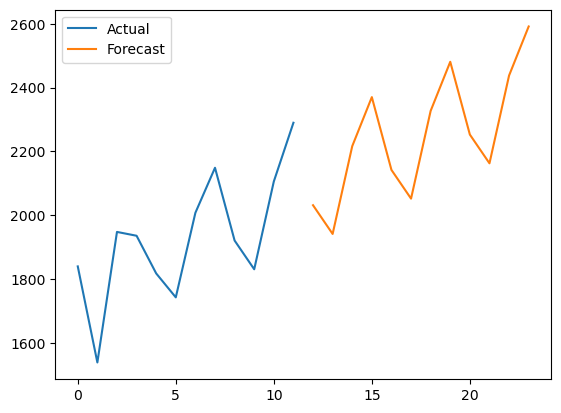

In [82]:
plt.plot(df_grouped['Quantity'], label='Actual')
plt.plot(forecast.index, forecast , label='Forecast')
plt.legend()
plt.show()

In [83]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters method on training data
hw_model = ExponentialSmoothing(Train['Quantity'], seasonal_periods=6, trend='add', seasonal='add').fit()

# Predictions on test data using the fitted model
pred_hw = hw_model.forecast(len(Test))

# Calculate MAPE between predicted and actual values
mape_hw = np.mean(np.abs((Test['Quantity'] - pred_hw) / Test['Quantity'])) * 100
mape_hw

nan

In [84]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Fit an Exponential Smoothing model to the data
model = ExponentialSmoothing(df_grouped['Quantity'], seasonal_periods=4, trend='mul', seasonal='mul')
model_fit = model.fit()

# Forecast for the next 12 periods
forecast = model_fit.forecast(steps=12)
forecast

12    2354.292695
13    2157.696688
14    2971.109688
15    3224.600067
16    3317.869166
17    3040.809380
18    4187.140045
19    4544.380211
20    4675.822945
21    4285.366770
22    5900.873276
23    6404.326450
dtype: float64

In [85]:
# Prepare train and test datasets
train =df_grouped.Quantity
test =df_grouped.Quantity

# Calculate root mean squared error (RMSE) of the forecast
rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)

RMSE: 2286.1293990486815


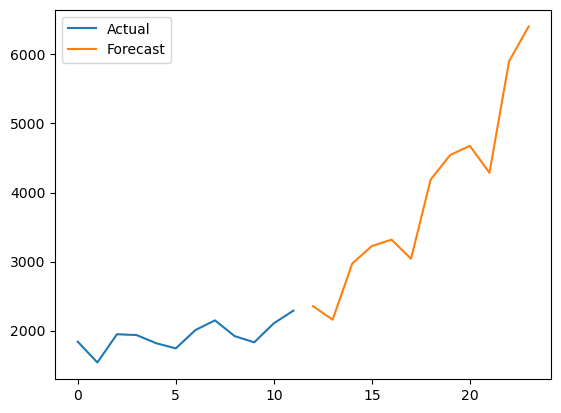

In [86]:
plt.plot(df_grouped['Quantity'], label='Actual')
plt.plot(forecast.index, forecast , label='Forecast')
plt.legend()
plt.show()

### Exponential Smoothing

In [88]:
# Date column as index
# df_grouped.set_index('Dateofbill', inplace=True)
# Computed rolling mean of the sales data using SES

alpha =1   # smoothing parameter
df_grouped['SES'] = df_grouped['Quantity'].ewm(alpha=alpha, adjust=False).mean()

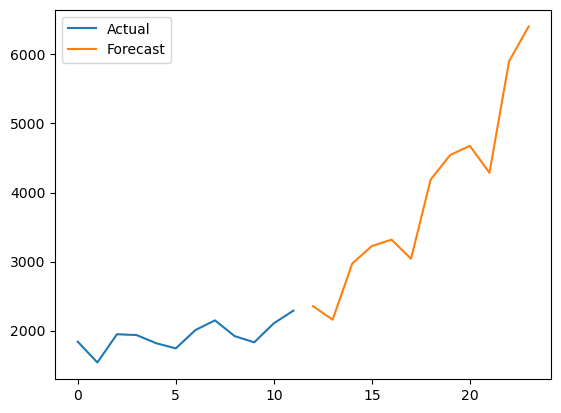

In [89]:
plt.plot(df_grouped['Quantity'], label='Actual')
plt.plot(forecast.index, forecast , label='Forecast')
plt.legend()
plt.show()

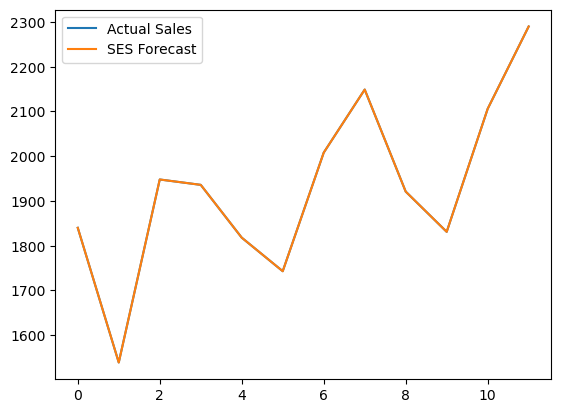

In [90]:
# Plot  of original sales data and the SES forecast
plt.plot(df_grouped['Quantity'], label='Actual Sales')
plt.plot(df_grouped['SES'], label='SES Forecast')
plt.legend()
plt.show()

# Random Forest & Linear Regression Model

Random Forest and Linear Regression are two distinct machine learning models, each with its characteristics and use cases.

1. **Random Forest:**
   - **Type:** Random Forest is an ensemble learning method, specifically a bagging technique.
   - **Use Cases:** It is used for both regression and classification tasks. Common applications include predicting customer behavior, stock prices, disease outbreak, and image classification.
   - **How It Works:** Random Forest builds multiple decision trees during training, each with a subset of the data and features. Predictions are made by aggregating the results from individual trees (voting for classification or averaging for regression).
   - **Strengths:** It's robust against overfitting, handles both categorical and numerical data, provides feature importances, and performs well in various scenarios.
   - **Weaknesses:** It may not perform well with very high-dimensional data and can be challenging to interpret.

2. **Linear Regression:**
   - **Type:** Linear Regression is a type of supervised learning algorithm used for regression tasks.
   - **Use Cases:** It is primarily used for predicting a continuous output variable. Typical applications include predicting house prices, stock prices, or any numerical value based on one or more input features.
   - **How It Works:** Linear Regression models the relationship between the independent variable(s) and the dependent variable by fitting a linear equation. It finds the best-fit line (in the case of simple linear regression) or a hyperplane (in the case of multiple linear regression) to make predictions.
   - **Strengths:** It's simple, interpretable, and works well when the relationship between variables is approximately linear.
   - **Weaknesses:** Linear Regression assumes a linear relationship, which may not hold in many real-world situations where relationships are more complex. It's sensitive to outliers and can be prone to overfitting in high-dimensional spaces.

In summary, Random Forest is a versatile ensemble method suitable for various tasks, and it's known for its robustness and predictive power. In contrast, Linear Regression is a straightforward and interpretable model primarily used for regression problems when a linear relationship between variables is assumed. The choice between these two models depends on the specific problem, the characteristics of the data, and the interpretability of the results.

In [91]:
# Selecting required columns
df = data[['Dateofbill', 'Quantity']]

In [92]:
# Setting the frequency of the DataFrame's index to 'MS
df.index.freq = 'MS'

In [93]:
# Viewing dataset
df.head(10)

,Dateofbill,Quantity
0,Jan,1840
1,Feb,1539
2,Mar,1948
3,Apr,1936
4,May,1818
5,Jun,1743
6,Jul,2008
7,Aug,2149
8,Sep,1921
9,Oct,1831


In [94]:
# Setting index
df.set_index('Dateofbill')

,Quantity
Dateofbill,
Jan,1840
Feb,1539
Mar,1948
Apr,1936
May,1818
Jun,1743
Jul,2008
Aug,2149
Sep,1921


<Axes: >

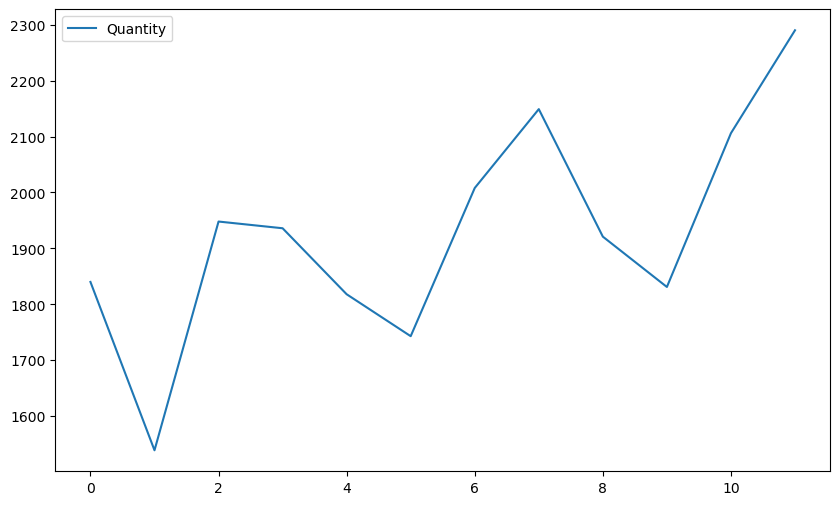

In [95]:
df.plot(figsize=(10,6))

In [96]:
# Shifting
df['Quantity_LastMonth']=df['Quantity'].shift(+1)
df['Quantity_2Monthsback']=df['Quantity'].shift(+2)
df['Quantity_3Monthsback']=df['Quantity'].shift(+3)
df

,Dateofbill,Quantity,Quantity_LastMonth,Quantity_2Monthsback,Quantity_3Monthsback
0,Jan,1840,NaN,NaN,NaN
1,Feb,1539,1840.0,NaN,NaN
2,Mar,1948,1539.0,1840.0,NaN
3,Apr,1936,1948.0,1539.0,1840.0
4,May,1818,1936.0,1948.0,1539.0
5,Jun,1743,1818.0,1936.0,1948.0
6,Jul,2008,1743.0,1818.0,1936.0
7,Aug,2149,2008.0,1743.0,1818.0
8,Sep,1921,2149.0,2008.0,1743.0
9,Oct,1831,1921.0,2149.0,2008.0


In [97]:
# Dropping missing values
df = df.dropna()
df

,Dateofbill,Quantity,Quantity_LastMonth,Quantity_2Monthsback,Quantity_3Monthsback
3,Apr,1936,1948.0,1539.0,1840.0
4,May,1818,1936.0,1948.0,1539.0
5,Jun,1743,1818.0,1936.0,1948.0
6,Jul,2008,1743.0,1818.0,1936.0
7,Aug,2149,2008.0,1743.0,1818.0
8,Sep,1921,2149.0,2008.0,1743.0
9,Oct,1831,1921.0,2149.0,2008.0
10,Nov,2106,1831.0,1921.0,2149.0
11,Dec,2290,2106.0,1831.0,1921.0


In [98]:
# Applying linear regression
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [99]:
# Applying random forest regressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [100]:
import numpy as np
x1,x2,x3,y=df['Quantity_LastMonth'],df['Quantity_2Monthsback'],df['Quantity_3Monthsback'],df['Quantity']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[1948. 1539. 1840.]
 [1936. 1948. 1539.]
 [1818. 1936. 1948.]
 [1743. 1818. 1936.]
 [2008. 1743. 1818.]
 [2149. 2008. 1743.]
 [1921. 2149. 2008.]
 [1831. 1921. 2149.]
 [2106. 1831. 1921.]]


In [101]:
# Splitting dataset
X_train,X_test,y_train,y_test=final_x[:],final_x[-10:],y[:],y[-10:]

In [102]:
# Model fitting
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

LinearRegression()

## Random Forest Regression

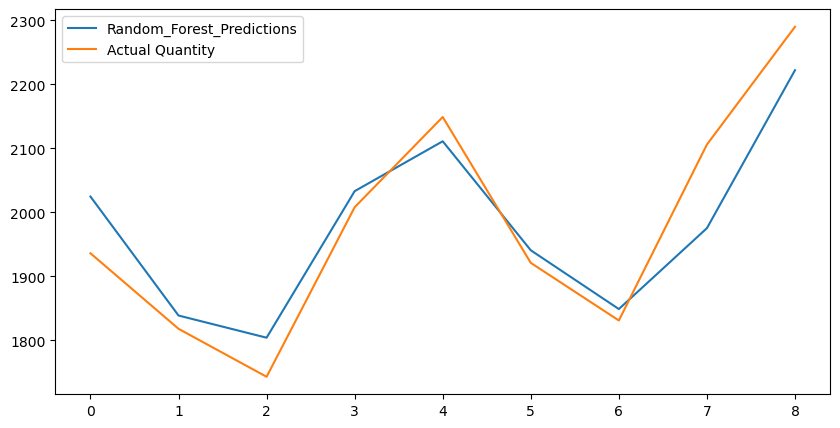

In [103]:
# Plotting curve
pred = model.predict(X_test)
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(pred, label='Random_Forest_Predictions')
plt.plot(y_test, label='Actual Quantity')
plt.legend(loc="upper left")
plt.show()

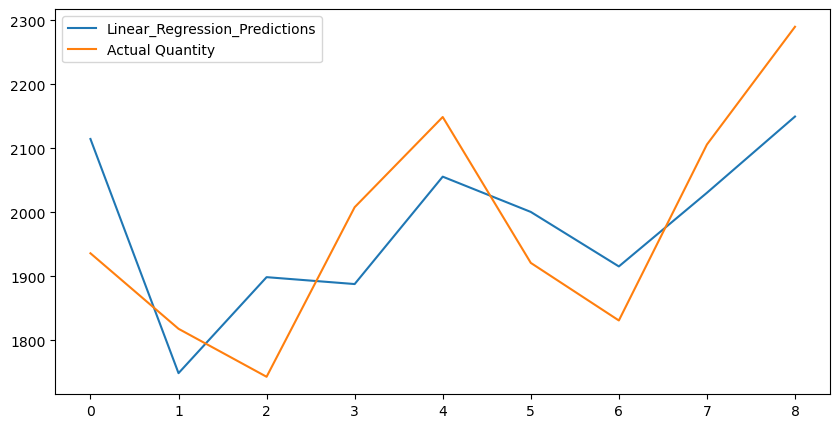

In [104]:
lin_pred=lin_model.predict(X_test)
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(lin_pred, label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Quantity')
plt.legend(loc="upper left")
plt.show()  

In [105]:
# Calculating rmse
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [106]:
# Printing rmse values
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 63.67562362823348
Mean Squared Error for Linear Regression Model is: 116.86991364583447
